In [3]:
def seconds (s):
    s = s.split(':')
    return int(s[0]) * 60 + int(s[1])

In [13]:
seconds('19:50')

1190

In [57]:
def f ():
    print(1)

In [61]:
class g:
    def __init__ (this):
        print(2)

In [86]:
class h:
    def __init__ (this, *x, **y):
        this.x = x
        this.y = y
    def __call__ (this, *x, **y): print(3, x, y)

In [63]:
p = lambda : print(4)

In [55]:
isinstance(f, Callable), isinstance(g, Callable), isinstance(h(), Callable), isinstance(p, Callable)

(True, True, True, True)

In [75]:
def q (callback : Callable, *args, **kwargs):
    print (callback.x)
    print(callback. y)
    callback(*args, **kwargs)

In [89]:
q(h(1,2,3, a=1,b=2,c=3),   1, 2, x=1,y=2)

(1, 2, 3)
{'a': 1, 'b': 2, 'c': 3}
3 (1, 2) {'x': 1, 'y': 2}


In [57]:
import re

In [59]:
re.sub('\.|·|,', '', '1.2')

'12'

In [114]:
f(1)

cost 0.0s


In [103]:
class RunTime:
    def __init__ (this, f : Callable):
        this.f = f
    def __call__ (this, *args, **kwargs):
        from time import time
        now = time()
        rst = this.f(*args, **kwargs)
        print (f'cost {time() - now}s')
        return rst

In [107]:
@RunTime
def f (x):
    from random import randint
    y = [randint(0, x) for i in range(x)]
    y.sort()

In [112]:
f(100000)

cost 0.12665963172912598s


In [43]:
def ff (*x):
    print (x, type(x))
    for y in x:
        print(y)

In [46]:
ff(*[1,2,3,])

(1, 2, 3) <class 'tuple'>
1
2
3


In [ ]:
ff(*[[1,2,3], [2,3,4], [4,5,6]])

In [ ]:
ff([1,2,3], [2,3,4], [4,5,6])

In [ ]:
ff([1,2,3,2,3,4,4,5,6])

In [ ]:
hh()

In [82]:
hh = h(1,2,3, a=1,b=2,c=3)

In [84]:
hh.x, hh.y

((1, 2, 3), {'a': 1, 'b': 2, 'c': 3})

In [85]:
q(hh)

(1, 2, 3)
{'a': 1, 'b': 2, 'c': 3}
3


In [77]:
from typing import Callable

ModuleNotFoundError: No module named 'objprint'

In [3]:
classmethod??

Init signature: classmethod(self, /, *args, **kwargs)
Docstring:     
classmethod(function) -> method

Convert a function to be a class method.

A class method receives the class as implicit first argument,
just like an instance method receives the instance.
To declare a class method, use this idiom:

  class C:
      @classmethod
      def f(cls, arg1, arg2, ...):
          ...

It can be called either on the class (e.g. C.f()) or on an instance
(e.g. C().f()).  The instance is ignored except for its class.
If a class method is called for a derived class, the derived class
object is passed as the implied first argument.

Class methods are different than C++ or Java static methods.
If you want those, see the staticmethod builtin.
Type:           type
Subclasses:     abstractclassmethod


# 库

In [1]:
import os, sys, json, re
import numpy as np, pandas as pd
from IPython.core.magic import register_cell_magic, register_line_cell_magic

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

NameError: name 'font1' is not defined

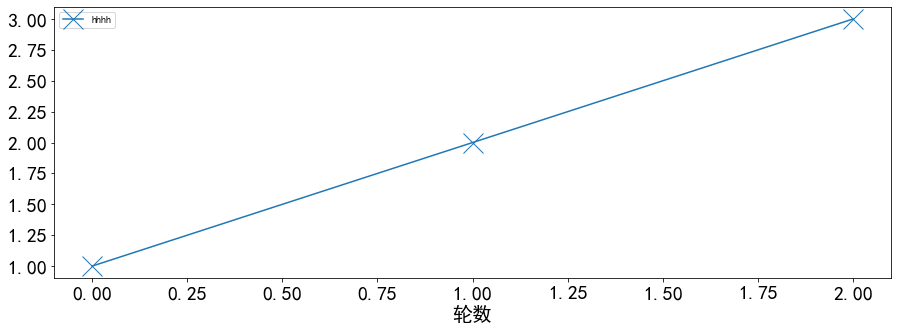

In [3]:
ax = pd.DataFrame({'hhhh' : [1,2,3]}).plot(figsize=(15,5), style=['x-'], markersize=20, fontsize =20);
labels = ax.get_xticklabels() + ax.get_yticklabels()
# [label.set_fontsize(20) for label in labels]
ax.set_xlabel('轮数',fontdict={'size':20})
ax.legend(prop=font1)

In [4]:
from vUtil.vTqdm import tqdm, trange
from vUtil.vLog import frmt
from vUtil.vFile import fprint

In [5]:
from cnd.cndEvaluater import CndEvaluater, loadEva

In [67]:
def _tolist(s):
    for x in zip(*[x.split() for x in s.split('\n') if x]):
        print(', '.join(x))
    
#     print(', '.join(x for x in s.split() if x))
@register_cell_magic
def tolist (line, cell):
    return _tolist (cell)

In [68]:
%%tolist
0.30386	0.59281
0.29797	0.59229
0.29306	0.59218
0.2959	0.59029
0.30354	0.5946
0.29742	0.58998
0.30168	0.59145
0.30703	0.5925
0.30976	0.59071
0.31303	0.59344
0.3103	0.5926


0.30386, 0.29797, 0.29306, 0.2959, 0.30354, 0.29742, 0.30168, 0.30703, 0.30976, 0.31303, 0.3103
0.59281, 0.59229, 0.59218, 0.59029, 0.5946, 0.58998, 0.59145, 0.5925, 0.59071, 0.59344, 0.5926


In [26]:
class Marker:
    markers = 'xoDs+*v><^'
    lines = ['-', '--', ':', '-.']
    colors = 'ybgkrmc'
    
    def __init__ (this):
        this._marker = iter(this.getMarker())
        this._colors = iter(this.getColors())
    
    def getLines (this):
        while 1:
            for l in this.lines:
                yield l
    
    def getMarker (this):
        while 1:
            for m in this.markers:
                yield m
    
    def getColors (this):
        while 1:
            for c in this.colors:
                yield c
    
    @property
    def marker(this):
        return next(this._colors) + next(this._marker) + '-'
    
marker = Marker()

In [44]:
fontSize = 25
figWeidth = 15

In [45]:
class ModelPlot(Marker):
    def __init__ (this, *args):
        '''
        args : (fileName, modelName=fileName)
        '''
        Marker.__init__(this)
        this.models = [
            (x, x) if isinstance(x, str) else (
                (x[0], x[0]) if len(x) == 0 else (x[0], x[1])
            )
            for x in args
        ]
        
        this.models = []
        for x in args:
            if isinstance(x, str):
                fileName = modelName = x
            elif len(x) == 0:
                fileName = modelName = x[0]
            else:
                fileName, modelName, *_ = x
            
            historys, epochHis = this.loadHistorys(fileName)
            model = dict(modelName=modelName, historys=historys, epochHis=epochHis)
            this.models.append(model)
                
        
    def loadHistorys (this, file, path=None):
        path = path or 'cnd/model2/'
        file = os.path.join(path, 'historys', file + '.json')
        with open(file, 'r') as f:
            rst, epochHis, epochs = json.load(f)
        historys = [loadEva(h) for h in rst]
        return historys, epochHis
    
    def _plot (this, step, ax, modelName, historys, epochHis, **kwargs):
        index = []
        value = []
        i0 = epochHis[0] - 1
        for i, h in zip(epochHis, historys):
            if i0 <= i:
                index.append(i)
                value.append(h.accuracy)
                i0 = max(i0 + step, i)
        
        return pd.DataFrame({
            modelName : value,
        }, index=index).plot(ax=ax, style=[this.marker], **kwargs)
    
    def plot (this, step=1, fontSize=fontSize, figsize=(figWeidth,5), **kwargs):
        ax = None
        for model in this.models:
            ax = this._plot(step=step, ax=ax, figsize=figsize, fontsize=fontSize,
                            markersize=fontSize//2, **model, **kwargs)
        if ax:
            font = {'size' : fontSize}
            ax.set_xlabel('轮数', fontdict=font)
            ax.set_ylabel('正确率', fontdict=font)
            ax.legend(prop=font)
        return ax
    
    __call__ = plot

In [90]:
class ModelPlot2(Marker):
    def __init__ (this, df):
        Marker.__init__(this)
        this.df = df
    
    def plot (this, xlabel=None, ylabel=None, fontSize=fontSize, figsize=(figWeidth,10), markers=None, **kwargs):
        ax = this.df.plot(style=markers or [this.marker for x in this.df], 
                          figsize=figsize, fontsize=fontSize,
                            markersize=fontSize//2, **kwargs)
        font = {'size' : fontSize}
        ax.set_xlabel(xlabel or '轮数', fontdict=font)
        ax.set_ylabel(ylabel or '正确率', fontdict=font)
        ax.legend(prop=font)
        return ax

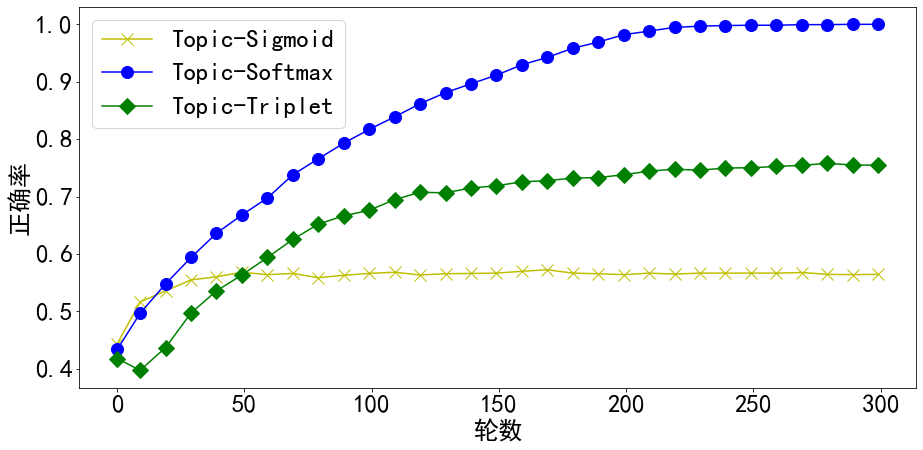

In [49]:
ax = ModelPlot(
    ('sigmoid+bert+batchlock10+300', 'Topic-Sigmoid'),
    ('softmax+bert+batchlock10+300', 'Topic-Softmax'),
    ('triplet+bert+scale10+300', 'Topic-Triplet')
).plot(step=10, figsize=(figWeidth, 7));

In [207]:
%%tolist
0.55907
0.53772
0.53047
0.52352
0.52031
0.52155


0.55907, 0.53772, 0.53047, 0.52352, 0.52031, 0.52155


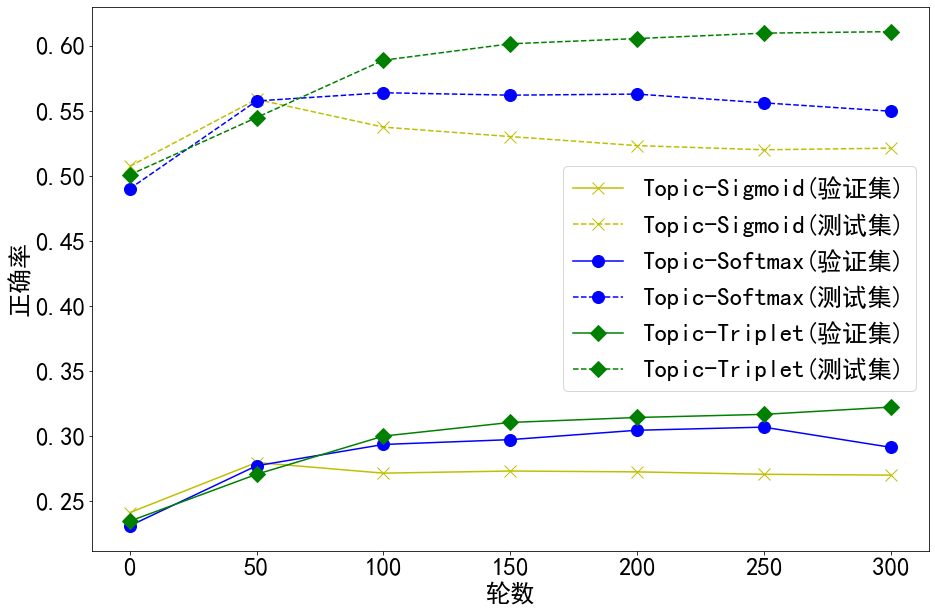

In [48]:
ax = ModelPlot2(pd.DataFrame({
    'Topic-Sigmoid(验证集)' : [0.24143, 0.27996, 0.27177, 0.27341, 0.27276, 0.2709, 0.27025],
    'Topic-Sigmoid(测试集)' : [0.50756, 0.55907, 0.53772, 0.53047, 0.52352, 0.52031, 0.52155],
    'Topic-Softmax(验证集)' : [0.23128, 0.27745, 0.29382, 0.29753, 0.30474, 0.30714, 0.29164],
    'Topic-Softmax(测试集)' : [0.49036, 0.55782, 0.56415, 0.56228, 0.56311, 0.55637, 0.54995],
    'Topic-Triplet(验证集)' : [0.23488, 0.2709, 0.30026, 0.31074, 0.31456, 0.31696, 0.32253],
    'Topic-Triplet(测试集)' : [0.50104, 0.54508, 0.58912, 0.60176, 0.6058, 0.60995, 0.61109],
},index=range(0,301,50))).plot(markers = [
    x + y + z
    for x, y in zip(marker.markers[:3], 'ybg') for z in marker.lines[:2]
])

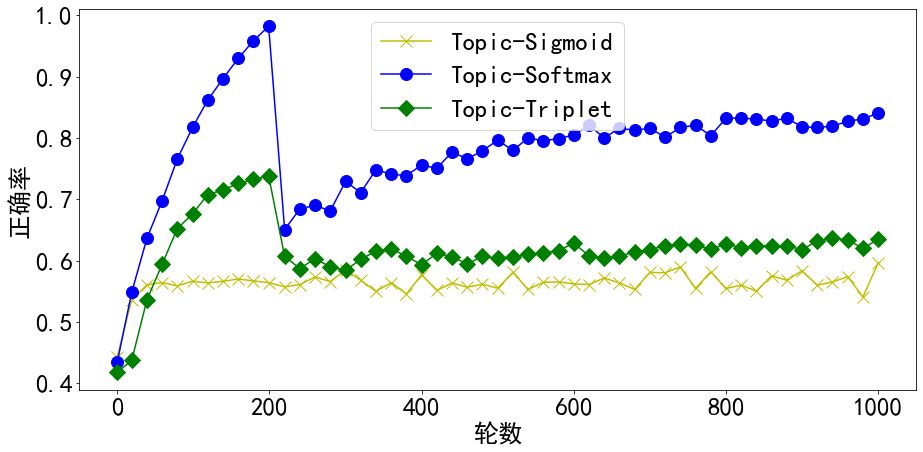

In [56]:
ax = ModelPlot(
    ('sigmoid+bert+batchlock10+200+random800', 'Topic-Sigmoid'),
    ('softmax+bert+batchlock10+200+random800', 'Topic-Softmax'),
    ('triplet+bertscale10++200+random800', 'Topic-Triplet')
).plot(step=20, figsize=(figWeidth, 7));

In [71]:
%%tolist
0.31456	0.6058
0.31412	0.63026
0.31391	0.62653
0.32187	0.63244
0.31161	0.63067
0.31663	0.63575
0.32242	0.6428
0.32547	0.64249
0.3162	0.64321
0.32766	0.64839
0.32547	0.64777
0.32875	0.64788



0.31456, 0.31412, 0.31391, 0.32187, 0.31161, 0.31663, 0.32242, 0.32547, 0.3162, 0.32766, 0.32547, 0.32875
0.6058, 0.63026, 0.62653, 0.63244, 0.63067, 0.63575, 0.6428, 0.64249, 0.64321, 0.64839, 0.64777, 0.64788


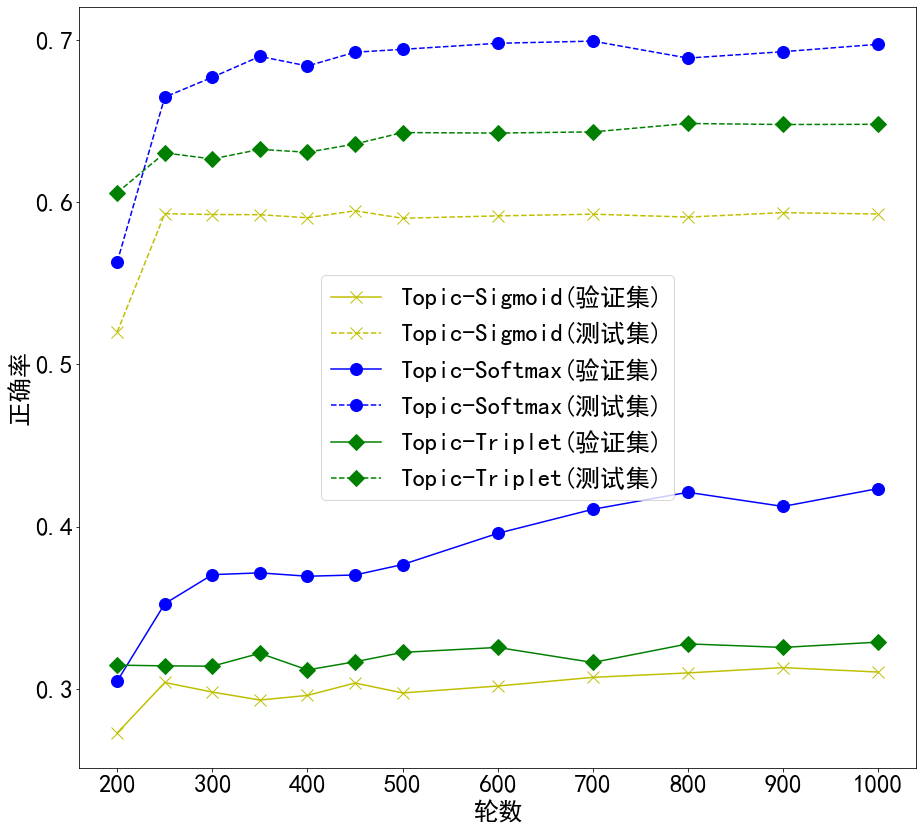

In [79]:
ax = ModelPlot2(pd.DataFrame({
    'Topic-Sigmoid(验证集)' : [0.27276, 0.30386, 0.29797, 0.29306, 0.2959, 0.30354, 0.29742, 0.30168, 0.30703, 0.30976, 0.31303, 0.3103],
    'Topic-Sigmoid(测试集)' : [0.51991, 0.59281, 0.59229, 0.59218, 0.59029, 0.5946, 0.58998, 0.59145, 0.5925, 0.59071, 0.59344, 0.5926],
    'Topic-Softmax(验证集)' : [0.30474, 0.35243, 0.37033, 0.37143, 0.36935, 0.37012, 0.37656, 0.39577, 0.41061, 0.42109, 0.41236, 0.42338],
    'Topic-Softmax(测试集)' : [0.56311, 0.66466, 0.67689, 0.68974, 0.68383, 0.69233, 0.69409, 0.69782, 0.69917, 0.6887, 0.69264, 0.6972],
    'Topic-Triplet(验证集)' : [0.31456, 0.31412, 0.31391, 0.32187, 0.31161, 0.31663, 0.32242, 0.32547, 0.3162, 0.32766, 0.32547, 0.32875],
    'Topic-Triplet(测试集)' : [0.6058, 0.63026, 0.62653, 0.63244, 0.63067, 0.63575, 0.6428, 0.64249, 0.64321, 0.64839, 0.64777, 0.64788],
},index=[*range(200,500,50)] + [*range(500,1001,100)])).plot(markers = [
    x + y + z
    for x, y in zip(marker.markers[:3], 'ybg') for z in marker.lines[:2]
], figsize=(figWeidth,14))

In [98]:
%%tolist
0.3103	0.5926
0.51386	0.66425
0.56625	0.65511
0.5513	0.63442
0.53143	0.61918
0.51648	0.60952


0.3103, 0.51386, 0.56625, 0.5513, 0.53143, 0.51648
0.5926, 0.66425, 0.65511, 0.63442, 0.61918, 0.60952


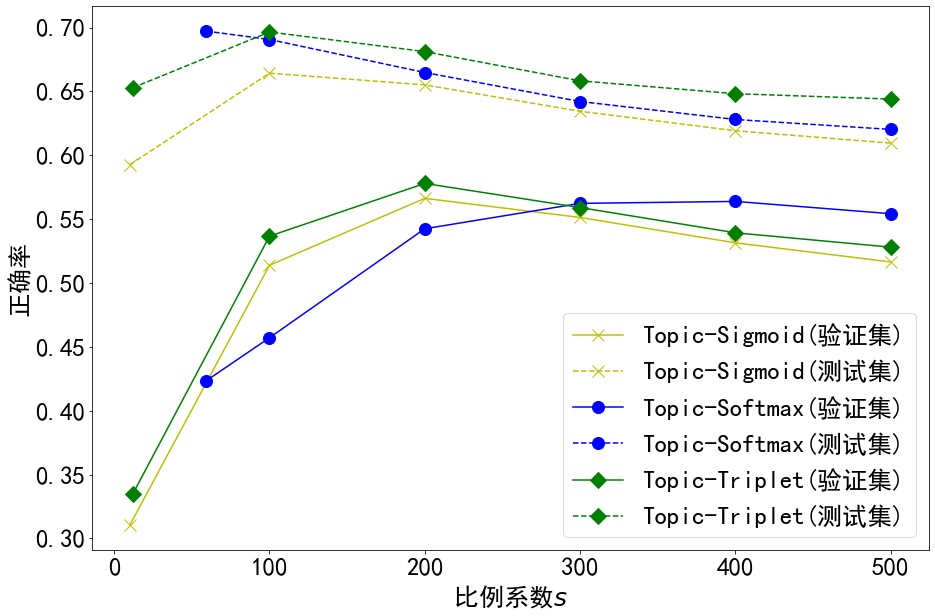

In [99]:
figsize = (figWeidth,10)
xlabel = '比例系数$s$'

ax = ModelPlot2(pd.DataFrame({
    'Topic-Sigmoid(验证集)' : [0.3103, 0.51386, 0.56625, 0.5513, 0.53143, 0.51648],
},index=[10.003767] + [*range(100,600,100)])).plot(xlabel=xlabel,
    markers = marker.markers[0] + 'y' + marker.lines[0], figsize=figsize)
ax = ModelPlot2(pd.DataFrame({
    'Topic-Sigmoid(测试集)' : [0.5926, 0.66425, 0.65511, 0.63442, 0.61918, 0.60952],
},index=[10.003767] + [*range(100,600,100)])).plot(xlabel=xlabel,
    markers = marker.markers[0] + 'y' + marker.lines[1], figsize=figsize,ax=ax)
ax = ModelPlot2(pd.DataFrame({
    'Topic-Softmax(验证集)' : [0.42338, 0.45711, 0.54246, 0.56232, 0.56385, 0.55425],
},index=[59.16278] + [*range(100,600,100)])).plot(xlabel=xlabel,
    markers = marker.markers[1] + 'b' + marker.lines[0], figsize=figsize,ax=ax)
ax = ModelPlot2(pd.DataFrame({
    'Topic-Softmax(测试集)' : [0.6972, 0.69062, 0.66478, 0.64208, 0.62801, 0.62023],
},index=[59.16278] + [*range(100,600,100)])).plot(xlabel=xlabel,
    markers = marker.markers[1] + 'b' + marker.lines[1], figsize=figsize,ax=ax)
ax = ModelPlot2(pd.DataFrame({
    'Topic-Triplet(验证集)' : [0.33453, 0.53667, 0.57793, 0.55905, 0.53929, 0.52805],
},index=[11.858985] + [*range(100,600,100)])).plot(xlabel=xlabel,
    markers = marker.markers[2] + 'g' + marker.lines[0], figsize=figsize,ax=ax)
ax = ModelPlot2(pd.DataFrame({
    'Topic-Triplet(测试集)' : [0.6528, 0.6965, 0.68116, 0.65826, 0.64818, 0.64398],
},index=[11.858985] + [*range(100,600,100)])).plot(xlabel=xlabel,
    markers = marker.markers[2] + 'g' + marker.lines[1], figsize=figsize,ax=ax)

In [105]:
%%tolist
0.05588	0.43587
0.04093	0.42652
0.06669	0.37893
0.07378	0.34394
0.07575	0.32041
0.07269	0.2993
0.07542	0.28343


0.05588, 0.04093, 0.06669, 0.07378, 0.07575, 0.07269, 0.07542
0.43587, 0.42652, 0.37893, 0.34394, 0.32041, 0.2993, 0.28343


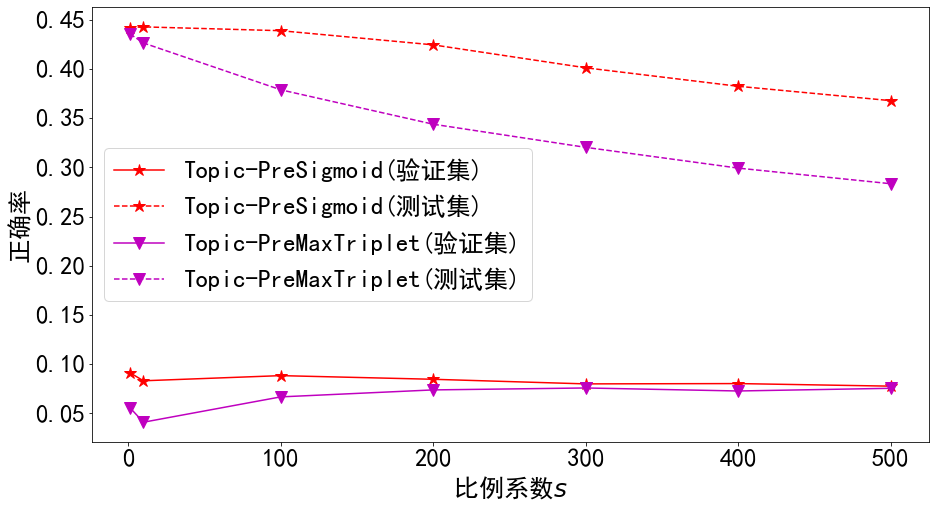

In [110]:
xlabel = '比例系数$s$'
ax = ModelPlot2(pd.DataFrame({
    'Topic-PreSigmoid(验证集)' : [0.09136, 0.08306, 0.0883, 0.08459, 0.0799, 0.08022, 0.0776],
    'Topic-PreSigmoid(测试集)' : [0.44217, 0.4429, 0.43902, 0.42462, 0.4013, 0.3825, 0.3679],
    'Topic-PreMaxTriplet(验证集)' : [0.05588, 0.04093, 0.06669, 0.07378, 0.07575, 0.07269, 0.07542],
    'Topic-PreMaxTriplet(测试集)' : [0.43587, 0.42652, 0.37893, 0.34394, 0.32041, 0.2993, 0.28343],
},index=[1, 10] + [*range(100,600,100)])).plot(xlabel=xlabel, markers = [
    x + y + z
    for x, y in zip(marker.markers[5:7], marker.colors[4:6]) for z in marker.lines[:2]
], figsize=(figWeidth,8))

In [101]:
marker.colors

'ybgkrmc'

In [82]:
a = set(range(1000000))

In [84]:
%%time
for i in range(100):
    b = list(a)[0]

CPU times: total: 1.59 s
Wall time: 1.6 s


In [85]:
%%time
for i in range(100):
    b, *_ = a

CPU times: total: 1.59 s
Wall time: 1.59 s


In [88]:
%%time
for i in range(100):
    for b in a: break

CPU times: total: 0 ns
Wall time: 0 ns


In [92]:
%%time
for i in range(100):
    b = next(iter(a))

CPU times: total: 0 ns
Wall time: 0 ns
